# Import Libraries

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score, recall_score, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Data Understanding and Description

In [2]:
#Read dataset
data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

#Display dataset
print(data)

#Display data shape
data.shape

        Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHea

(253680, 22)

In [3]:
#Transform data to integer 
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [4]:
#Show data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

In [5]:
#Show unique value of each columns
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['Unique Value']).transpose()

,Unique Value
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [6]:
#Show descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [7]:
#Function to view the value counts for each values of all columns 
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [8]:
v_counts(data)

0    218334
1     35346
Name: Diabetes_binary, dtype: int64
_____________________________________________________________________________
0    144851
1    108829
Name: HighBP, dtype: int64
_____________________________________________________________________________
0    146089
1    107591
Name: HighChol, dtype: int64
_____________________________________________________________________________
1    244210
0      9470
Name: CholCheck, dtype: int64
_____________________________________________________________________________
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: BMI, Length: 84, dtype: int64
_____________________________________________________________________________
0    141257
1    112423
Name: Smoker, dtype: int64
_____________________________________________________________________________
0    243388
1     10292
Name: Stroke, dtype: int64
____________________________________________

Text(0.5, 1.0, 'Features correlation')

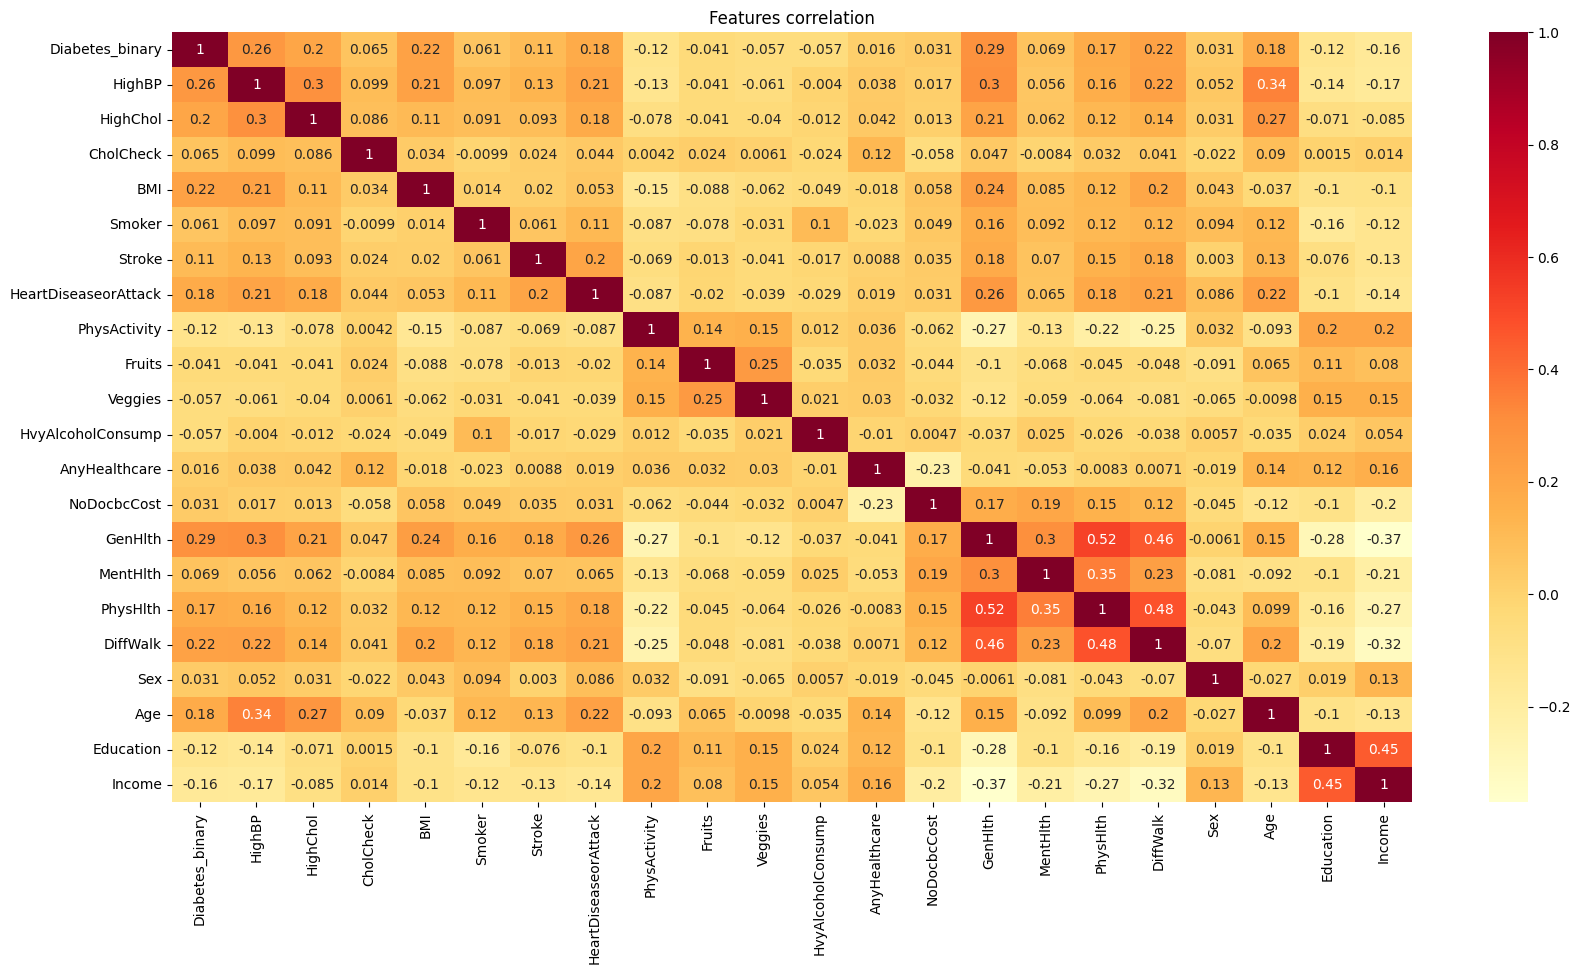

In [9]:
#Plot heatmap to identify patterns, trends, and relationships in the data
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(numeric_only=True),annot=True , cmap ='YlOrRd' )
plt.title("Features correlation")

Highly correlated features: 

Positively correlated - (GenHlth , PhysHlth), (PhysHlth, DiffWalk), (GenHlth, DiffWalk)

Negatively correlated - (GenHlth , Income), (DiffWalk ,Income)

These pairs of features are highly correlated and might be redundant for our model training.

# Data Preprocessing

Data Cleaning 

In [10]:
#Check missing value
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

No Missing Value

In [11]:
#Remove duplicate data
#Check duplication
data.duplicated().sum()

24206

In [12]:
#Drop duplications in dataframe
data.drop_duplicates(inplace=True)

# drop any rows with missing values
data = data.dropna() 

In [13]:
#recheck duplication (drop duplications)
data.duplicated().sum()

0

In [14]:
#Data left after removing duplication
data.shape

(229474, 22)

Duplicated data removed

Data Normalization on BMI using Min-Max Normalization

In [15]:
#Min-Max Normalization on BMI
BMI_min = np.min(data['BMI'])
BMI_max = np.max(data['BMI'])

BMI_norm = (data['BMI'] - BMI_min) / (BMI_max - BMI_min)

#Replace BMI with normalized values
data['BMI'] = BMI_norm

#Display new BMI values
print(data['BMI'])

0         0.325581
1         0.151163
2         0.186047
3         0.174419
4         0.139535
            ...   
253675    0.383721
253676    0.069767
253677    0.186047
253678    0.127907
253679    0.151163
Name: BMI, Length: 229474, dtype: float64


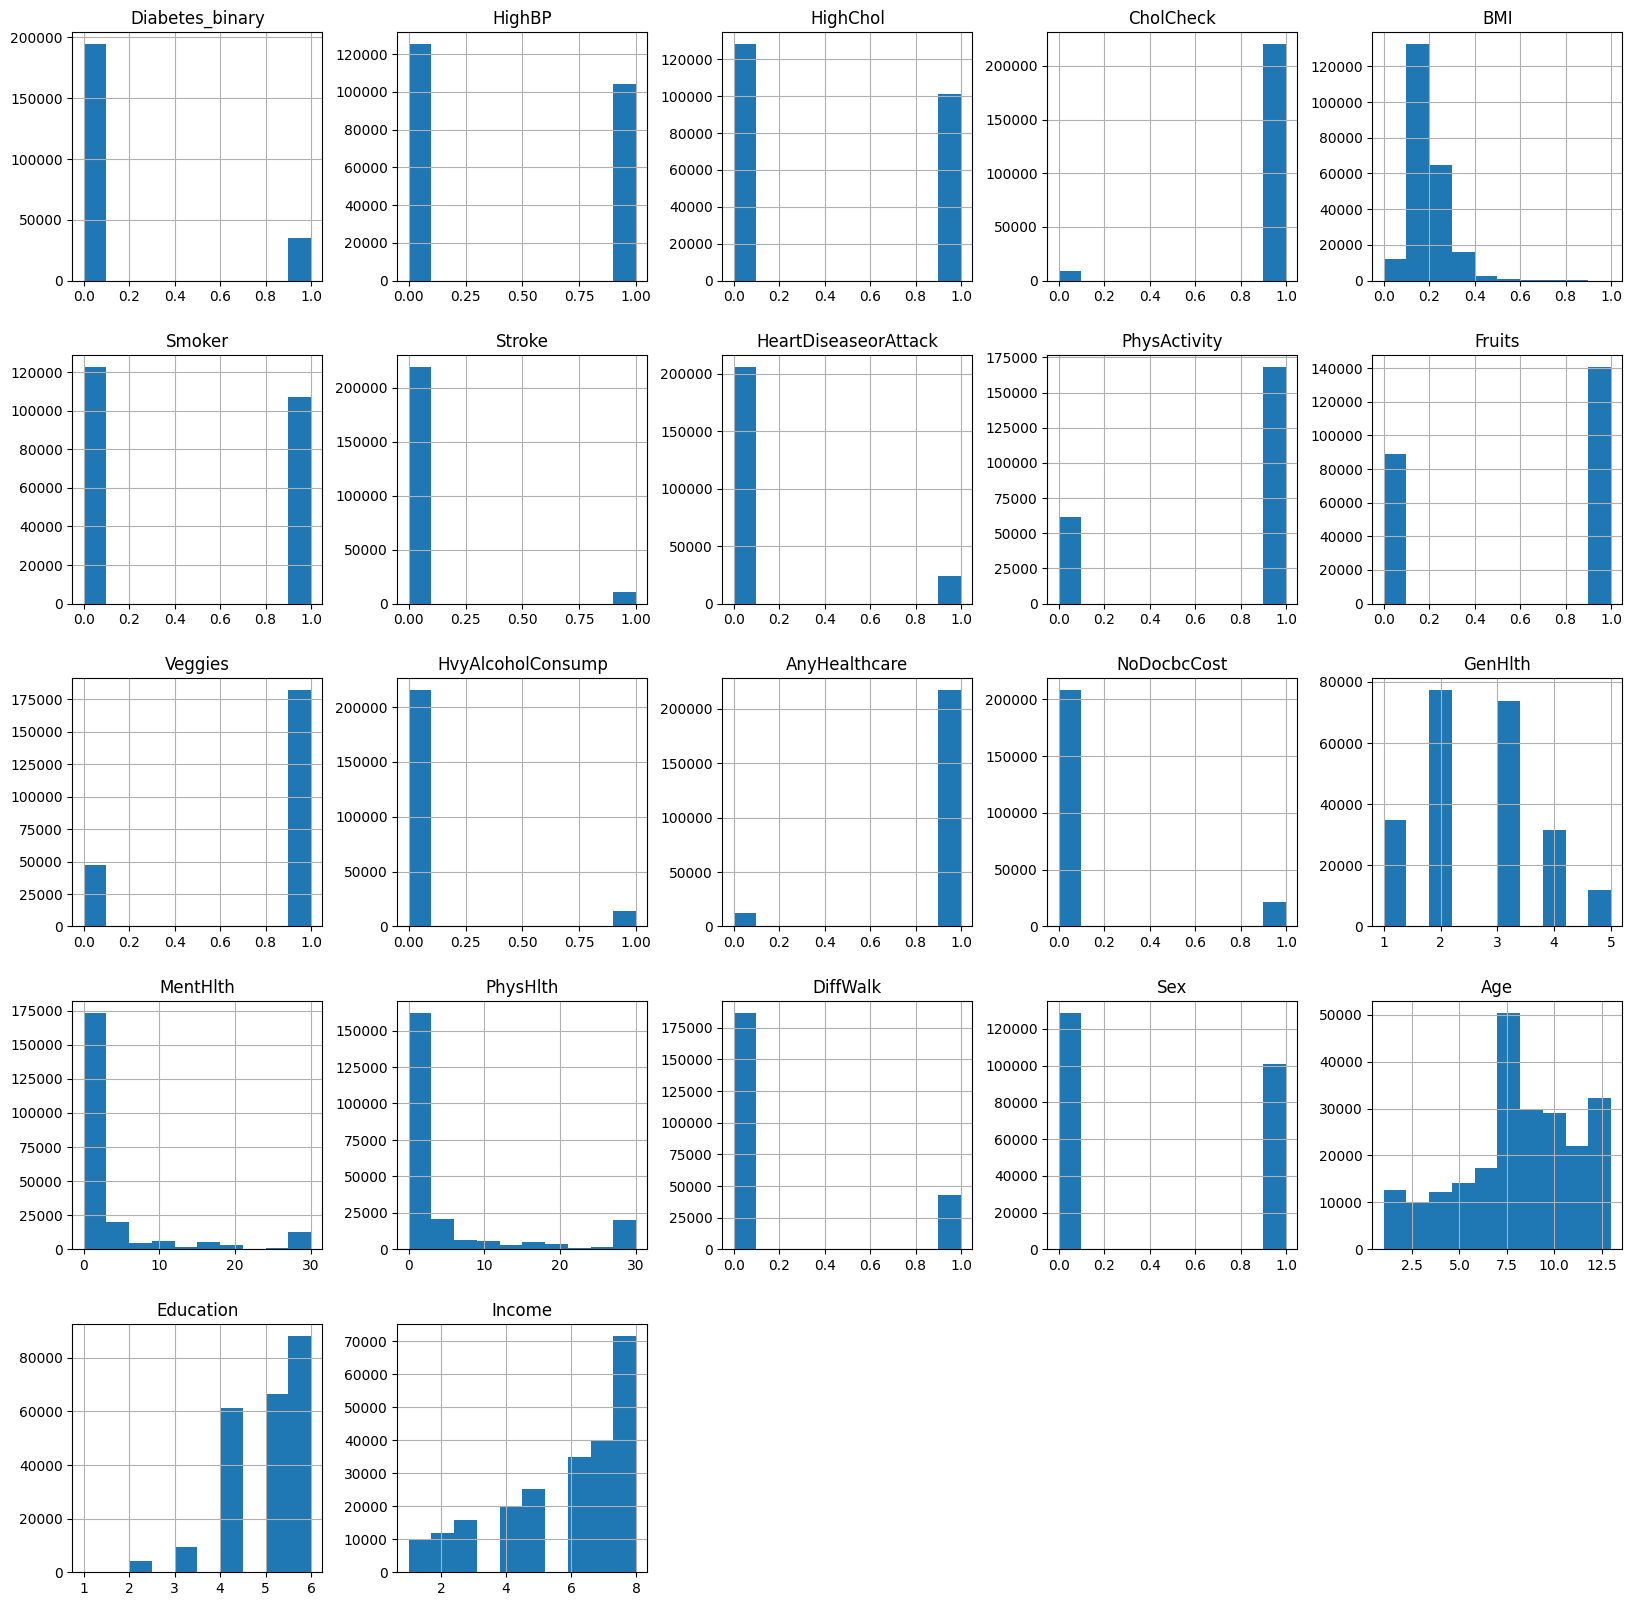

In [16]:
#Display data in Histogram 
data.hist(figsize=(20,20));

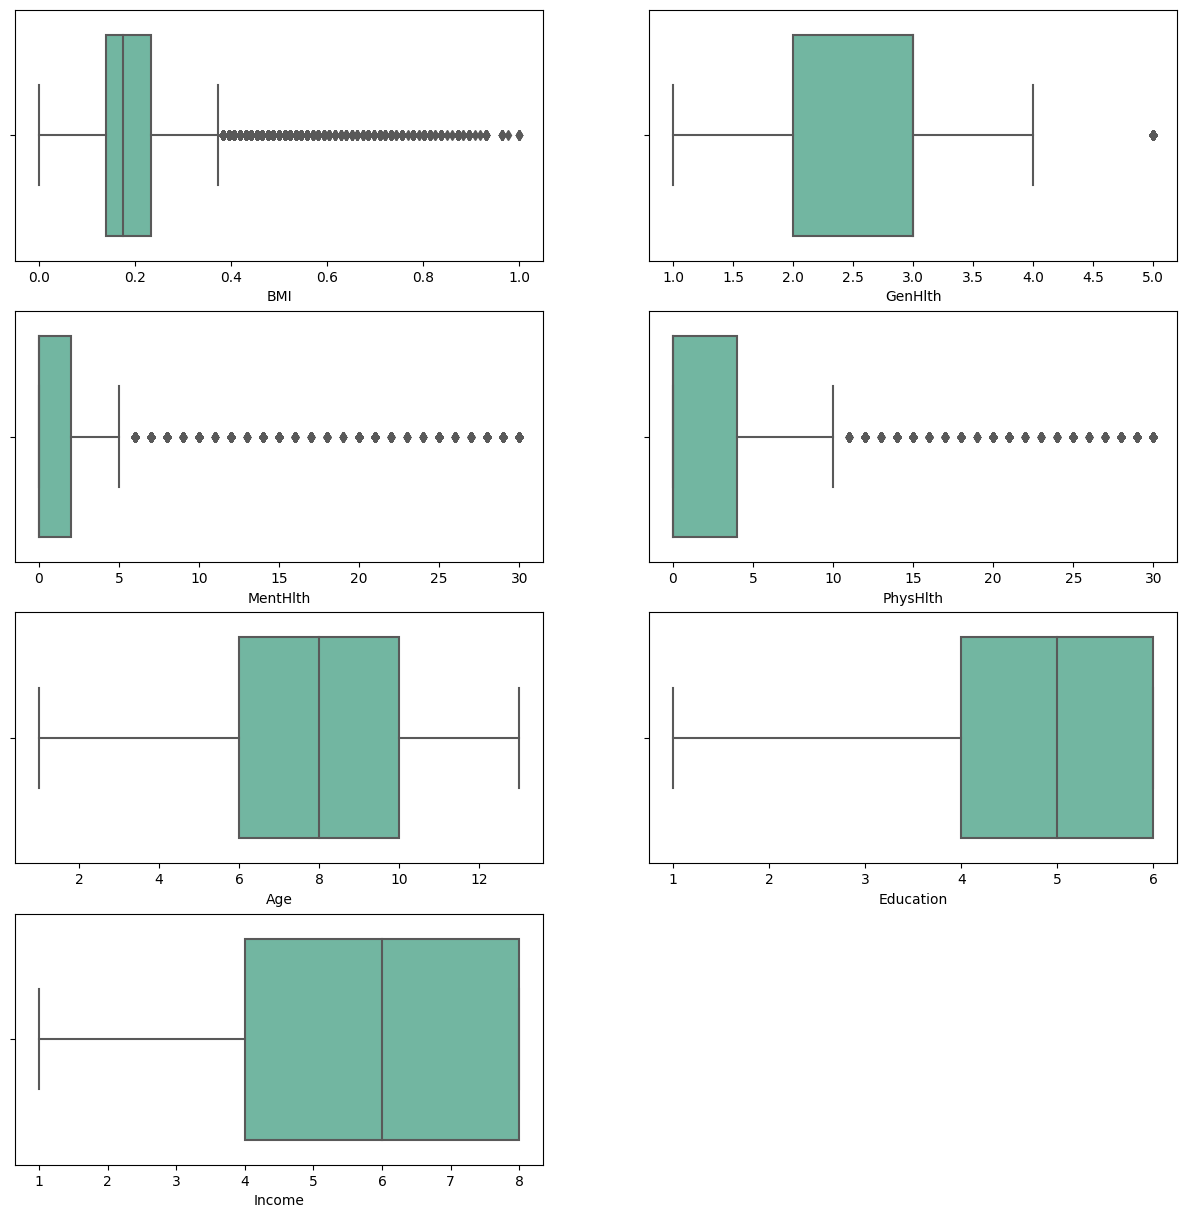

In [17]:
#Display non-binary data in Boxplot to check for outliers
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

From the boxplots and histograms, 

we can see that 'BMI', 'MentHlth', 'PhysHlth' and 'GenHlth' contain outliers. 

'Income' is skewed to the left. 'BMI' is skewed to the right.

'Age' and 'Education' are normally distributed. 

We identify the outliers using Z-score method.

In [18]:
# Get Z-score value
z_scores = np.abs(stats.zscore(data))

# Define the threshold value
threshold = 3

# Identify outlier indices
outlier_indices = np.where(z_scores > threshold)

# Remove outliers and store in a variable
clean_data = data.drop(data.index[outlier_indices[0]])

print("Number of outliers found:", (data.shape[0] - clean_data.shape[0]))
print("Outliers percentage: ", (data.shape[0] - clean_data.shape[0]) / data.shape[0])

Number of outliers found: 67416
Outliers percentage:  0.2937849168097475


The outliers should not be removed as the outliers are natural value that is not caused by any measurement errors, wrong data collection, or wrong data entry. Removing them may cause loss of valuable information. Also, Removing 29% of data from the original dataset is a huge amount of data removal that may cause inaccurate result of model performance later. 

# Exploratory Data Analysis

We will now see the relationship between interval type attribute with the target class 

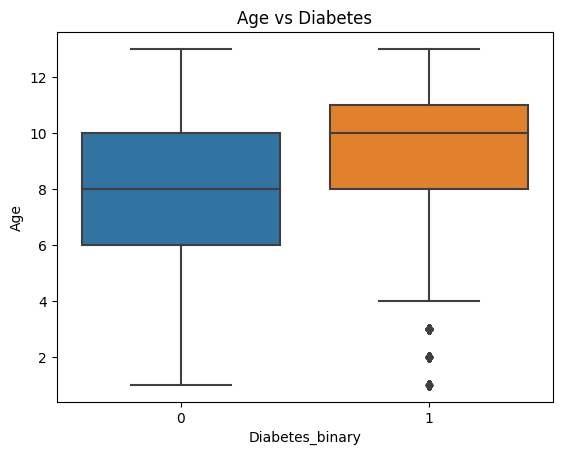

In [19]:
#See the relationship between 'Age' and target class
sns.boxplot(x = 'Diabetes_binary', y = 'Age', data = data)
plt.title('Age vs Diabetes')
plt.show()

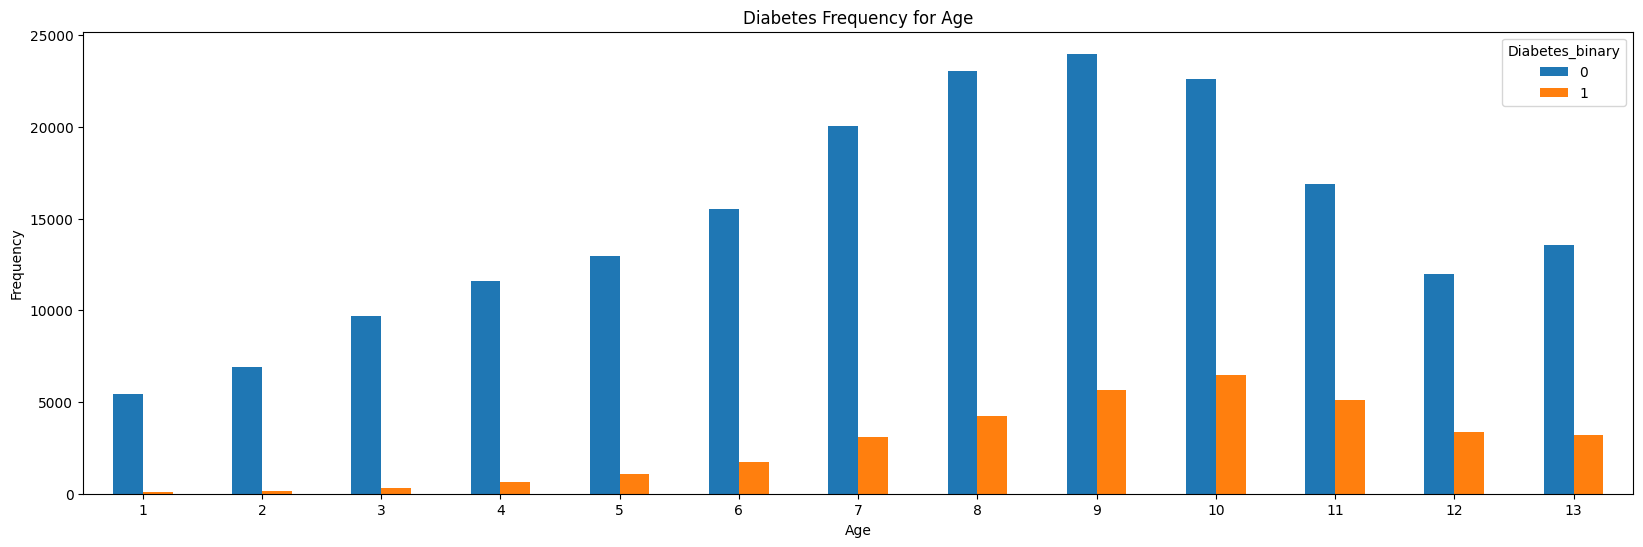

In [20]:
pd.crosstab(data.Age,data.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Frequency for Age')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

From the table above we know that as the age increases, the chances of diabetes also commonly increases. Hence, the median of the age of diabetic people is greater than that of non-diabetic people.

Text(0.5, 1.0, 'Relationship between Income and Diabetes')

<Figure size 2000x1000 with 0 Axes>

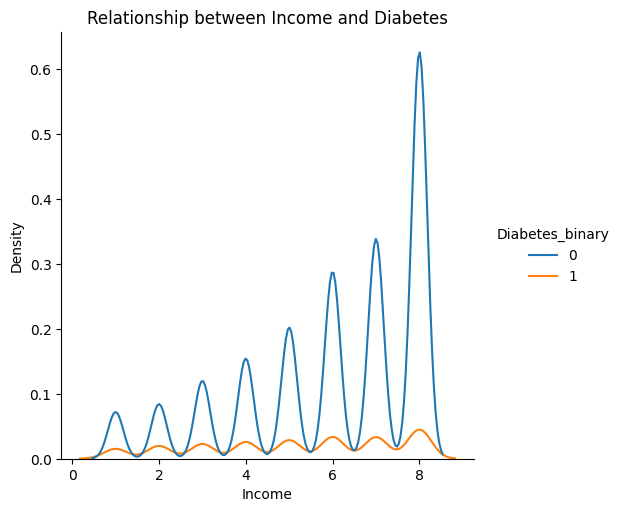

In [21]:
#See the relationship between Income and target class
plt.figure(figsize=(20,10))

sns.displot(data=data, x="Income", hue="Diabetes_binary", kind="kde")
plt.title("Relationship between Income and Diabetes")

From the graph above, we can see that most people have high income. The higher the income, the healthier the people(lessser probability of getting diabetes).

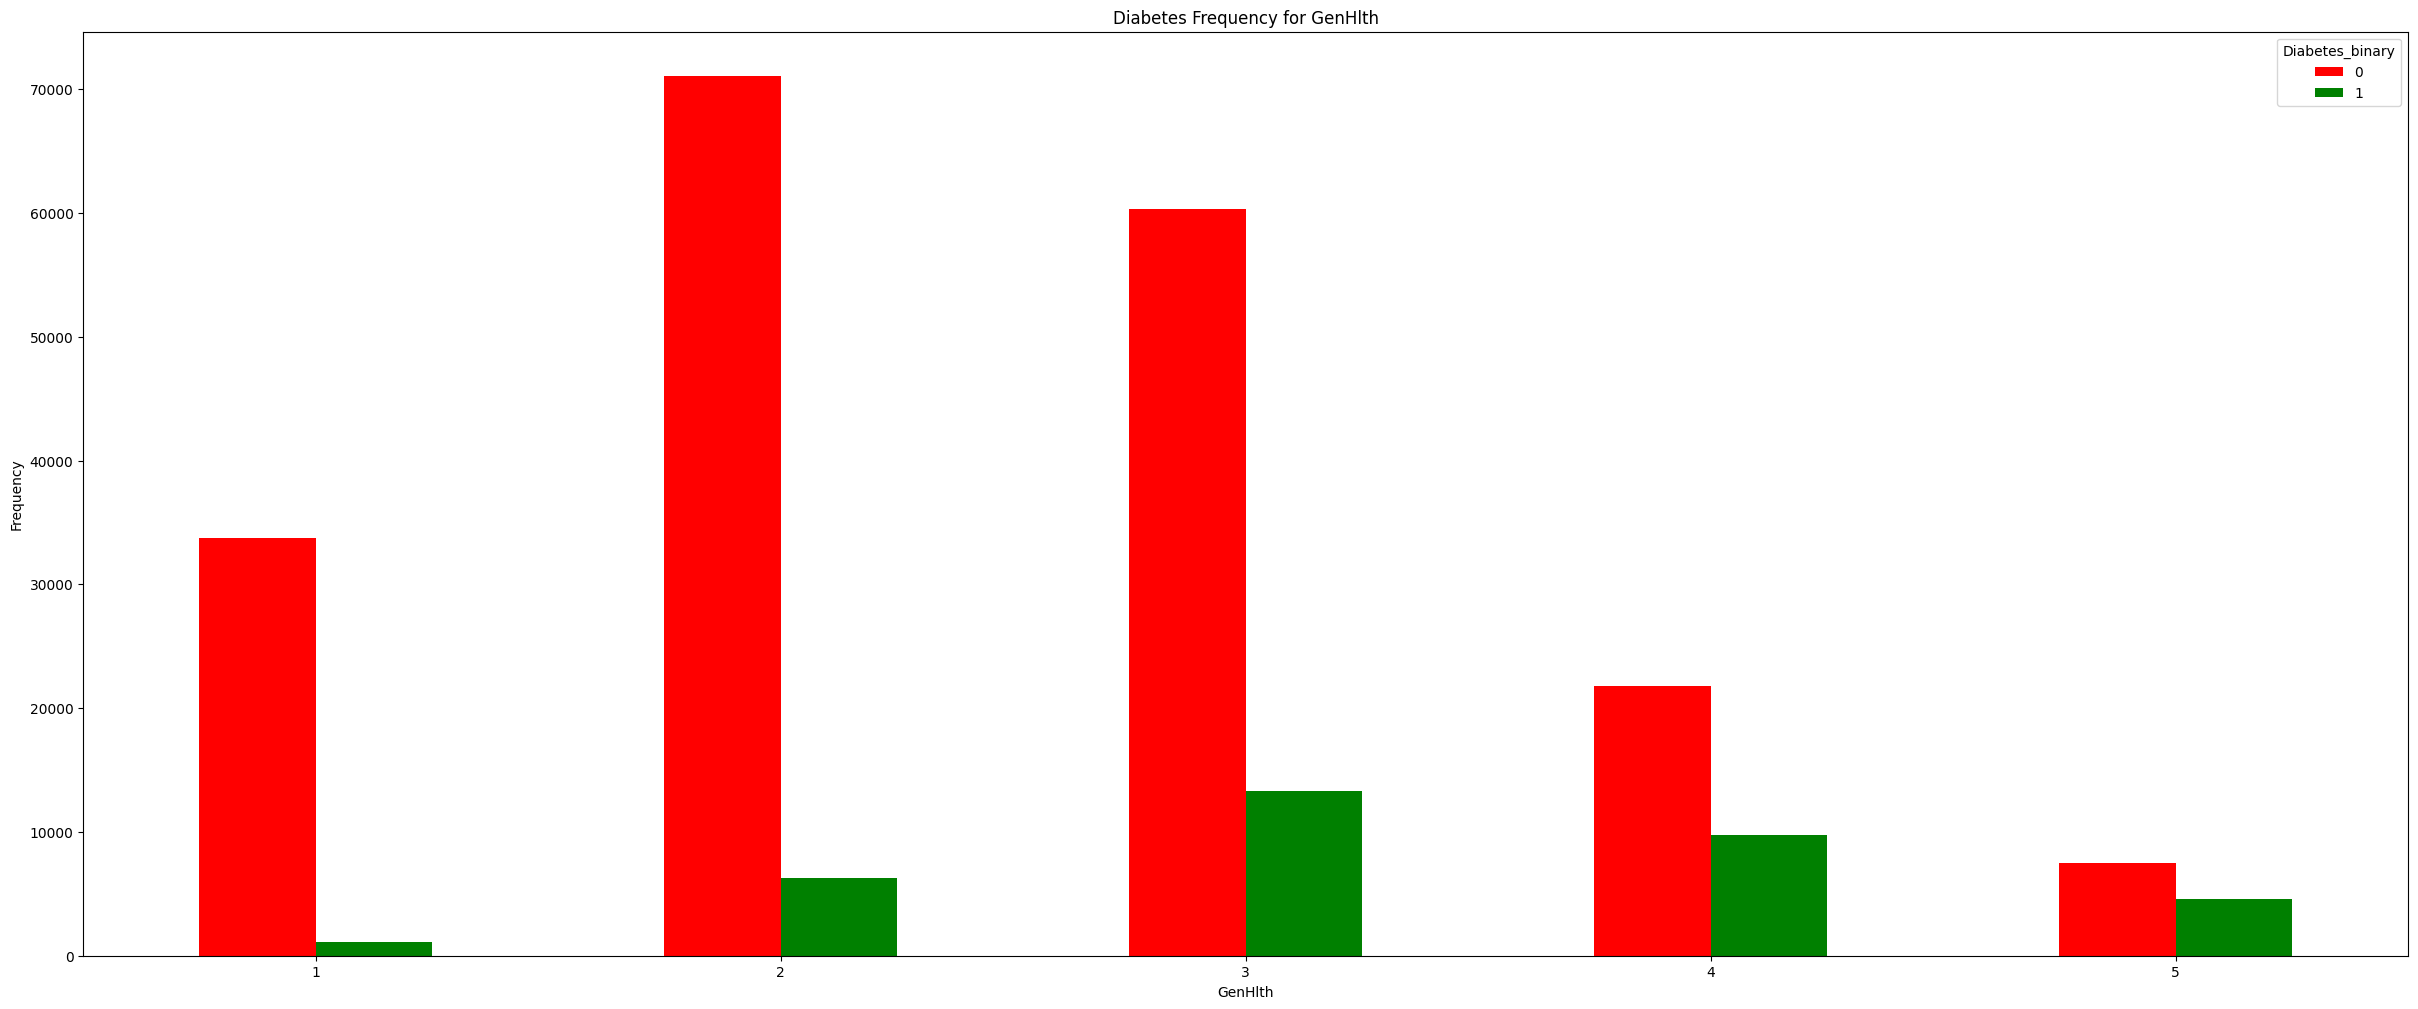

In [22]:
#See the relationship between GenHlth and target class
pd.crosstab(data.GenHlth,data.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Red', 'Green' ])
plt.title('Diabetes Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Less people has GenHlth of '4' and '5' which is generally less healthy and most of them are suffering from diabetes.

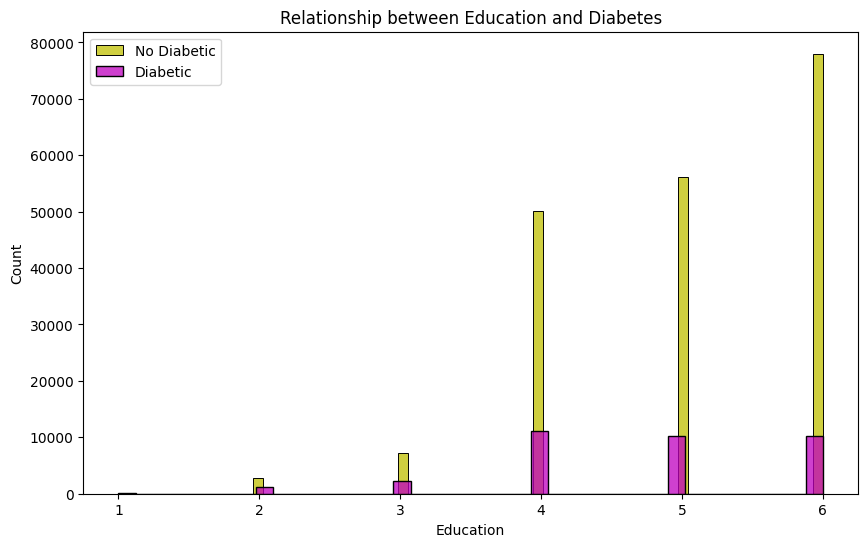

In [23]:
# See the relationship between Education and target class
plt.figure(figsize=(10,6))


sns.histplot(data.Education[data.Diabetes_binary == 0], color="y", label="No Diabetic" )
sns.histplot(data.Education[data.Diabetes_binary == 1], color="m", label="Diabetic" )
plt.title("Relationship between Education and Diabetes")

plt.legend()

From the graph above, we can conclude that the higher the education of a person, the chances of getting diabetic is lower.

# Feature Engineering

Creates a new feature called 'health_risk_score' that combines information from three variables: 'BMI', 'HighBP', and 'HighChol'. The new feature is created by assigning weights to the different levels of each variable, based on their potential contribution to overall health risk.

In [24]:
# create a new feature that combines the three variables
# assign a weight of 2 to BMI >= 0.3, 1 to BMI >= 0.25 and 0 to the rest
# assign a weight of 2 to HighBP and HighChol, and 0 to their absence
data['health_risk_score'] = (2 * (data['BMI'] >= 0.3)) + \
                            (1 * ((data['BMI'] >= 0.25) & (data['BMI'] < 0.3))) + \
                            (2 * data['HighBP']) + \
                            (2 * data['HighChol'])

# check the new feature engineering variable which is in the new column
print(data[['BMI', 'HighBP', 'HighChol', 'health_risk_score']].head())

# Check new number of columns
data.shape

        BMI  HighBP  HighChol  health_risk_score
0  0.325581       1         1                  6
1  0.151163       0         0                  0
2  0.186047       1         1                  4
3  0.174419       1         0                  2
4  0.139535       1         1                  4


(229474, 23)

This will create a new variable called health_risk_score that combines the BMI category, HighBP, and HighChol variables to capture the overall health risk of each individual. The health_risk_score will range from 0 to 6, with higher scores indicating higher health risk.

# Feature Selection

Features will be filtered out to improve accuracy and performance of Model

In [25]:
# Select top 15 features using chi-square test
selector = SelectKBest(chi2, k=15)
selector.fit(data, data['Diabetes_binary'])

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = data.columns[selected_indices]

print(selected_features)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income',
       'health_risk_score'],
      dtype='object')


These features are remained after using Chi Square Test to rank the features

In [26]:
# Drop columns not in selected_features
data = data.loc[:, selected_features]

print(data.info)

<bound method DataFrame.info of         Diabetes_binary  HighBP  HighChol  Stroke  HeartDiseaseorAttack  \
0                     0       1         1       0                     0   
1                     0       0         0       0                     0   
2                     0       1         1       0                     0   
3                     0       1         0       0                     0   
4                     0       1         1       0                     0   
...                 ...     ...       ...     ...                   ...   
253675                0       1         1       0                     0   
253676                1       1         1       0                     0   
253677                0       0         0       0                     0   
253678                0       1         0       0                     0   
253679                1       1         1       0                     1   

        PhysActivity  HvyAlcoholConsump  GenHlth  MentHlth  PhysHlt

# Data Sampling 

In [27]:
#View target values data
print(data['Diabetes_binary'].value_counts())

0    194377
1     35097
Name: Diabetes_binary, dtype: int64


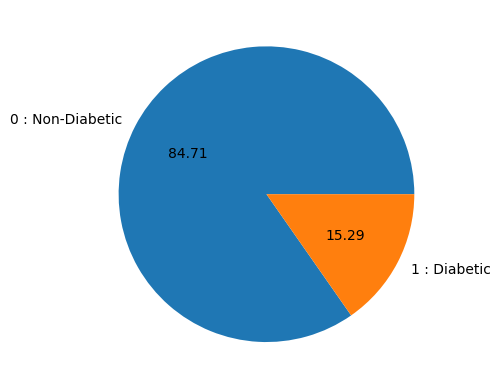

In [28]:
#Compare the target class using pie chart
plt.pie(data["Diabetes_binary"].value_counts() , labels = ["0 : Non-Diabetic","1 : Diabetic"] ,autopct='%.02f' );

We can see that the class is heavily imbalanced with 84.71% non-diabetic and 15.29% diabetic

We applied 2 data sampling techniques to balance our classes and test the model performance

Random Undersampling Without Replacement

In [29]:
# Separate majority and minority classes
non_diabetic_ru = data[data.Diabetes_binary==0]
diabetic_ru = data[data.Diabetes_binary==1]

# Downsample majority class
majority_downsampled = resample(non_diabetic_ru,
                                 replace=False, # Sample without replacement
                                 n_samples=len(diabetic_ru), # Number of samples equal to minority class
                                 random_state=42) # Reproducible results

# Combine minority class with downsampled majority class
balanced_ru = pd.concat([majority_downsampled, diabetic_ru])

# Shuffle the data
balanced_ru = balanced_ru.sample(frac=1, random_state=42)

print(balanced_ru['Diabetes_binary'].value_counts())

0    35097
1    35097
Name: Diabetes_binary, dtype: int64


NearMiss

In [30]:
# Copy data into new variable
data2 = data.copy()

# Form new feature matrix (x_nm) and target variable vector (y_nm)
x_nm = data2.drop("Diabetes_binary",axis=1)
y_nm = data2["Diabetes_binary"]

# Apply NearMiss algorithm to resample the data
nm = NearMiss(version = 1 , n_neighbors = 10)
x_nm,y_nm = nm.fit_resample(x_nm, y_nm)

print(y_nm.value_counts())

0    35097
1    35097
Name: Diabetes_binary, dtype: int64


The sample classes are now balanced 

# Data Splitting

In [31]:
# Splitting the data into features (X) and target (y)
x_ru = balanced_ru.drop('Diabetes_binary', axis=1)  # Features
y_ru = balanced_ru['Diabetes_binary']  # Target variable

# Splitting the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_ru, y_ru, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_nm, y_nm, test_size=0.2, random_state=42)

# Printing the shapes of the training and testing sets
print("X_train shape:", X_train1.shape)
print("X_test shape:", X_test1.shape)
print("y_train shape:", y_train1.shape)
print("y_test shape:", y_test1.shape)

X_train shape: (56155, 14)
X_test shape: (14039, 14)
y_train shape: (56155,)
y_test shape: (14039,)


 The train_test_split() function is used to randomly split the data into training and testing sets. The test_size argument specifies the proportion of data to be allocated for testing (in this case, 20%), and the random_state argument is set to 42 for reproducible results. The resulting X_train, X_test, y_train, and y_test variables represent the training and testing sets for features and target respectively. 

# Classification Model

Decision tree classification is a popular machine learning technique that is used for a variety of reasons

We select Decision Trees as our classifier due to its speed as the other classifiers are slightly slower in producing results due to our limitation of computational resources.

We perform classification using Decision Trees based on the 2 training and testing sets using different data sampling techniques. We originally used Random Undersampling Without Replacement but the result shows low accuracy which we decided to test the model using NearMiss to resample the data.

In [32]:
# Instantiate Decision Tree classifier
dt = DecisionTreeClassifier(max_depth = 12)

# Fit Decision Tree classifier to training data
dt.fit(X_train1, y_train1)

# Predict on training data
y_train_pred1 = dt.predict(X_train1)

# Evaluate Decision Tree classifier on training data
train_accuracy1 = dt.score(X_train1, y_train1)
print("Train Accuracy: {}".format(train_accuracy1))

# Predict on test data
y_test_pred = dt.predict(X_test1)

# Evaluate Decision Tree classifier on test data
test_accuracy1 = dt.score(X_test1, y_test1)
print("Test Accuracy: {}".format(test_accuracy1))

Train Accuracy: 0.7634939008102574
Test Accuracy: 0.7068879549825486


In [33]:
# Instantiate Decision Tree classifier
dt = DecisionTreeClassifier(max_depth = 12)

# Fit Decision Tree classifier to training data
dt.fit(X_train2, y_train2)

# Predict on training data
y_train_pred2 = dt.predict(X_train2)

# Evaluate Decision Tree classifier on training data
train_accuracy2 = dt.score(X_train2, y_train2)
print("Train Accuracy: {}".format(train_accuracy2))

# Predict on test data
y_test_pred2 = dt.predict(X_test2)

# Evaluate Decision Tree classifier on test data
test_accuracy2 = dt.score(X_test2, y_test2)
print("Test Accuracy: {}".format(test_accuracy2))

Train Accuracy: 0.8764134983527736
Test Accuracy: 0.8701474463993162


Since the results of using sample data from NearMiss is better, we will continue evaluate the model performance using this result. 

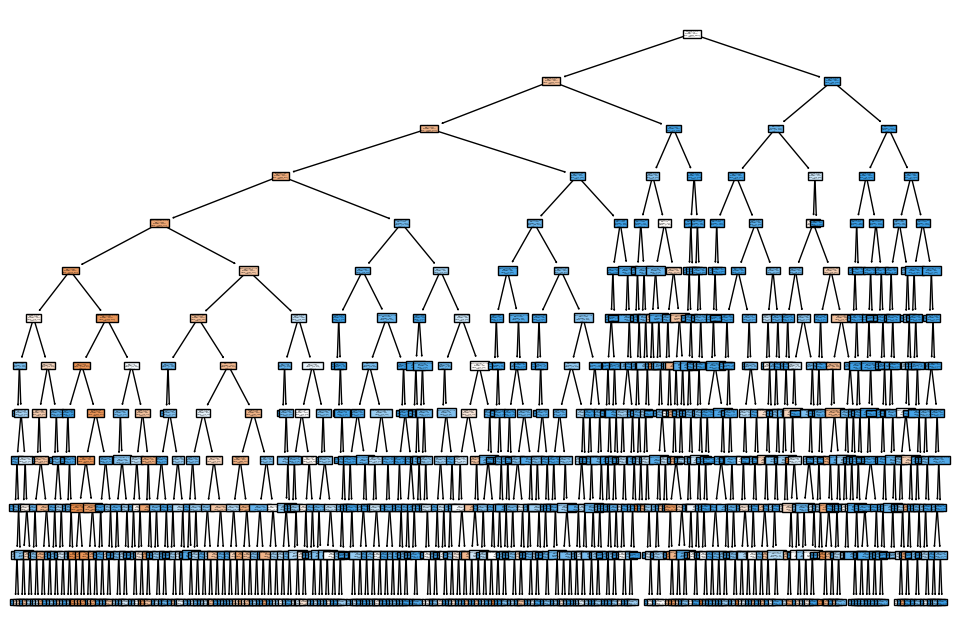

In [34]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt, feature_names=X_train2.columns, class_names=["0", "1"], filled=True)
plt.show()

Evaluate the model

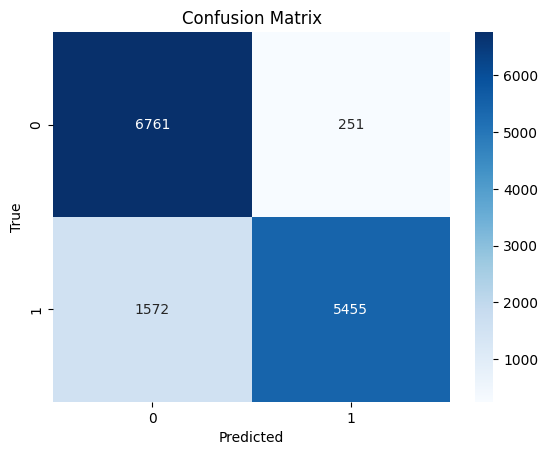

In [35]:
# Generate confusion matrix for Decision tree classification
cm = confusion_matrix(y_test2, y_test_pred2)

# Create a seaborn heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [36]:
print(classification_report(y_test2, y_test_pred2))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7012
           1       0.96      0.78      0.86      7027

    accuracy                           0.87     14039
   macro avg       0.88      0.87      0.87     14039
weighted avg       0.88      0.87      0.87     14039



In [37]:
# Calculate accuracy
accuracy = accuracy_score(y_test2, y_test_pred2)

# Calculate precision
precision = precision_score(y_test2, y_test_pred2)

# Calculate recall
recall = recall_score(y_test2, y_test_pred2)

# Calculate F1-score
f1 = f1_score(y_test2, y_test_pred2)

# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Accuracy: 0.87
Precision: 0.96
Recall: 0.78
F1-score: 0.86
